In [18]:
import rasterio
import keplergl
import numpy as np
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import matplotlib
import mapclassify
import json
import base64
import IPython


plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (6, 6), 'axes.edgecolor': '0.2'})

In [19]:
import geopandas as gpd

In [34]:
# Loading date
forest_data = gpd.read_file("data/FADM_PROV_FOREST")
forest_data = forest_data.to_crs("EPSG:4326")    # I'm converting to a different coordinate reference system
forest_data.head()


,FEATURE_ID,PRV_FRST_D,PRV_FRST_N,MP_BLCK_ID,DTA_SRC_CD,DT_SRC_CDN,CPTR_MTHDD,CPTR_MTHDN,ACCRCY_CD,EFF_DATE,...,COMMENTS,FEATURE_CD,WHO_UPDTD,WHEN_UPDTD,FC_SKEY,OBJ_V_SKEY,OBJECTID,AREA_SQM,FEAT_LEN,geometry
0,2084,114,Kitimat,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,102809.0,1.823465e+06,7.279941e+03,"POLYGON ((-128.48427 54.30898, -128.48444 54.3..."
1,2085,84,Skeena,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,102810.0,4.656531e+09,1.207955e+06,"MULTIPOLYGON (((-128.70612 54.63438, -128.6936..."
2,2086,114,Kitimat,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,102811.0,7.808455e+06,1.645594e+04,"MULTIPOLYGON (((-128.54663 54.35278, -128.5454..."
3,2087,37,Bell-Irving,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,102812.0,1.070620e+10,9.848731e+05,"POLYGON ((-130.31004 56.38185, -130.31003 56.3..."
4,2088,112,Hecate,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,102813.0,6.832526e+08,2.100182e+05,"POLYGON ((-130.00979 56.17126, -130.00966 56.1..."


In [32]:
type(forest_data)
forest_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FEATURE_ID  296 non-null    object  
 1   PRV_FRST_D  296 non-null    object  
 2   PRV_FRST_N  296 non-null    object  
 3   MP_BLCK_ID  277 non-null    object  
 4   DTA_SRC_CD  0 non-null      float64 
 5   DT_SRC_CDN  0 non-null      float64 
 6   CPTR_MTHDD  0 non-null      float64 
 7   CPTR_MTHDN  0 non-null      float64 
 8   ACCRCY_CD   0 non-null      float64 
 9   EFF_DATE    14 non-null     object  
 10  RETRMNT_DT  21 non-null     object  
 11  COMMENTS    0 non-null      float64 
 12  FEATURE_CD  0 non-null      float64 
 13  WHO_UPDTD   0 non-null      float64 
 14  WHEN_UPDTD  0 non-null      float64 
 15  FC_SKEY     296 non-null    float64 
 16  OBJ_V_SKEY  296 non-null    float64 
 17  OBJECTID    296 non-null    float64 
 18  AREA_SQM    296 non-null    float64 
 19  

In [40]:
# Drop columns with all NaN values
forest_data_cleaned = forest_data.dropna(axis=1, how='all')

# Drop the specified columns
columns_to_drop = ['MP_BLCK_ID', 'EFF_DATE', 'RETRMNT_DT', 'FC_SKEY', 'OBJ_V_SKEY']
forest_data_cleaned = forest_data_cleaned.drop(columns=columns_to_drop)

forest_data_cleaned

,FEATURE_ID,PRV_FRST_D,PRV_FRST_N,OBJECTID,AREA_SQM,FEAT_LEN,geometry
0,2084,114,Kitimat,102809.0,1.823465e+06,7.279941e+03,"POLYGON ((-128.48427 54.30898, -128.48444 54.3..."
1,2085,84,Skeena,102810.0,4.656531e+09,1.207955e+06,"MULTIPOLYGON (((-128.70612 54.63438, -128.6936..."
2,2086,114,Kitimat,102811.0,7.808455e+06,1.645594e+04,"MULTIPOLYGON (((-128.54663 54.35278, -128.5454..."
3,2087,37,Bell-Irving,102812.0,1.070620e+10,9.848731e+05,"POLYGON ((-130.31004 56.38185, -130.31003 56.3..."
4,2088,112,Hecate,102813.0,6.832526e+08,2.100182e+05,"POLYGON ((-130.00979 56.17126, -130.00966 56.1..."
...,...,...,...,...,...,...,...
291,2167,110,Deadman,103048.0,3.553462e+08,1.959459e+05,"MULTIPOLYGON (((-121.00092 51.12870, -121.0014..."
292,2168,104,Lac La Hache,103049.0,7.462096e+09,6.874360e+05,"POLYGON ((-121.51403 51.27498, -121.51401 51.2..."
293,461,33,Ashnola,103050.0,2.497472e+09,3.530435e+05,"POLYGON ((-120.09122 49.64466, -120.09088 49.6..."
294,541,124,Dewdney,103051.0,5.614993e+09,1.048950e+06,"POLYGON ((-121.40470 50.14819, -121.40427 50.1..."


In [35]:
forest_data_cleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FEATURE_ID  296 non-null    object  
 1   PRV_FRST_D  296 non-null    object  
 2   PRV_FRST_N  296 non-null    object  
 3   MP_BLCK_ID  277 non-null    object  
 4   EFF_DATE    14 non-null     object  
 5   RETRMNT_DT  21 non-null     object  
 6   FC_SKEY     296 non-null    float64 
 7   OBJ_V_SKEY  296 non-null    float64 
 8   OBJECTID    296 non-null    float64 
 9   AREA_SQM    296 non-null    float64 
 10  FEAT_LEN    296 non-null    float64 
 11  geometry    296 non-null    geometry
dtypes: float64(5), geometry(1), object(6)
memory usage: 27.9+ KB


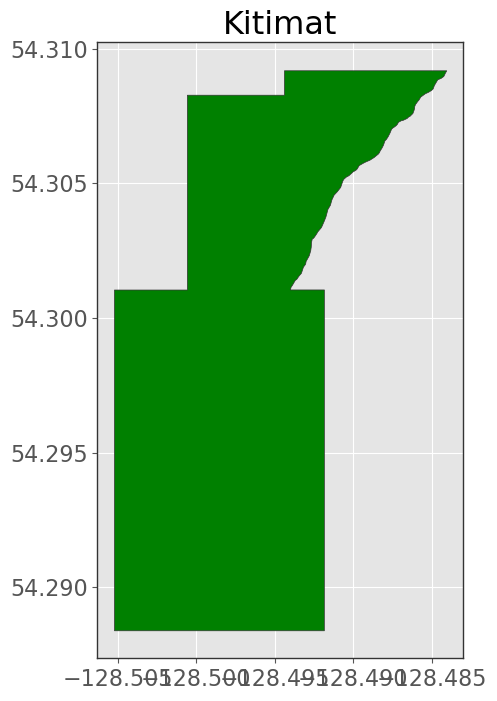

In [22]:
# Take a look at an example. The Kitimat Forest in BC. 
name = forest_data.iloc[0]["PRV_FRST_N"]
forest_data.iloc[[0]].plot(edgecolor="0.2", figsize=(10, 8), color = "green")
plt.title(name);

# 1. Basic Spatial Exploration

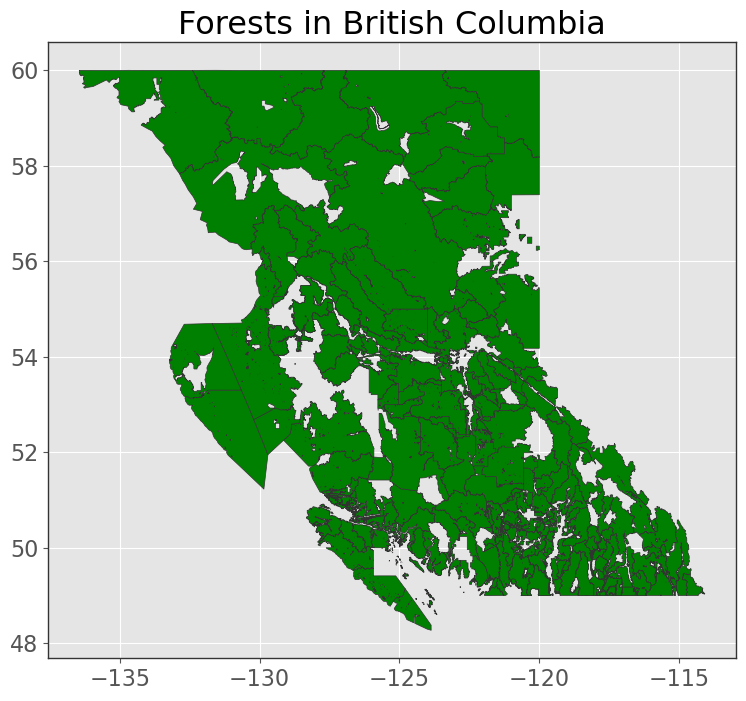

In [23]:
# Take a look at the entire forest map.
forest_data.plot(edgecolor="0.2", figsize=(10, 8), color ="green")
plt.title("Forests in British Columbia");

# 2. Forest Area Analysis

In [25]:
# Aggregate forest areas by region
region_area = forest_data.groupby('PRV_FRST_N')['AREA_SQM'].sum()
region_area

PRV_FRST_N
Adams            2.390443e+09
Arrowhead        4.886186e+09
Ashnola          7.496539e+09
Babine           1.704902e+10
Barriere         1.310375e+09
                     ...     
Williams Lake    3.641263e+09
Willow River     1.582089e+09
Windermere       3.693271e+09
Yahk             2.502357e+09
Yalakom          7.607636e+09
Name: AREA_SQM, Length: 139, dtype: float64

/opt/miniconda3/envs/mds574/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


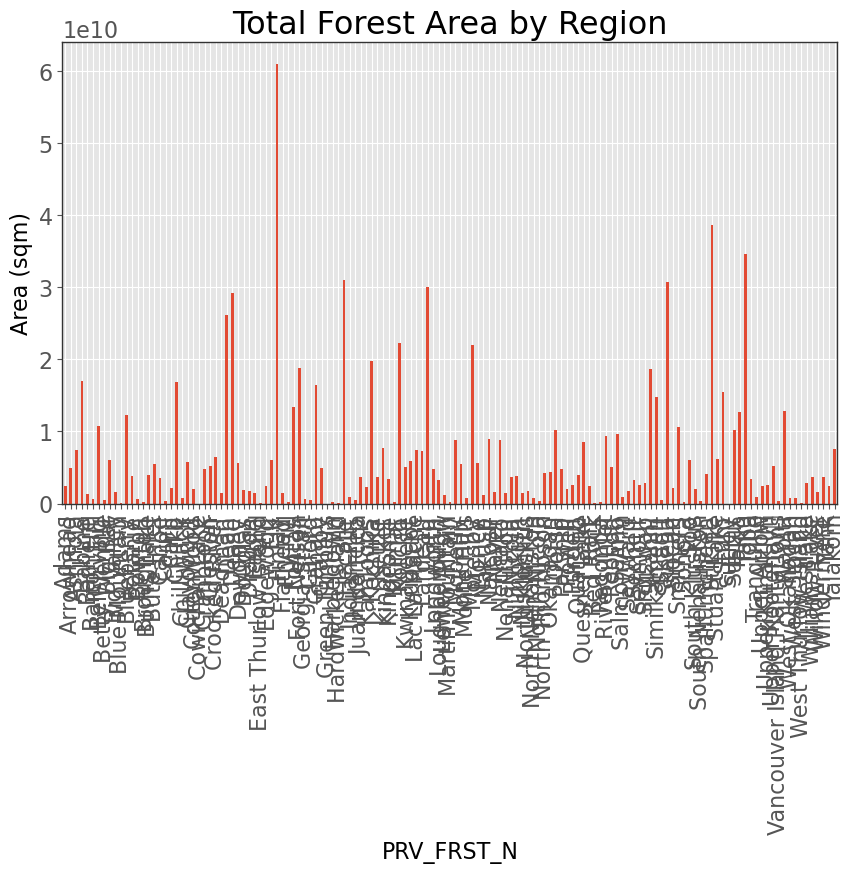

In [26]:
# Plot the aggregated data
region_area.plot(kind='bar', figsize=(10, 6))
plt.title('Total Forest Area by Region')
plt.ylabel('Area (sqm)')
plt.show()

# 3. Forest Change Analysis

In [29]:
# Convert 'EFF_DATE' to datetime and plot changes over time
# forest_data['EFF_DATE'] = pd.to_datetime(forest_data['EFF_DATE'])
forest_data['EFF_DATE']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
291               NaN
292               NaN
293               NaN
294               NaN
295    20161017143033
Name: EFF_DATE, Length: 296, dtype: object

In [42]:
# Buffer analysis to check proximity to human activities
buffered = forest_data.buffer(1000)  # Buffer of 1km
buffered.plot()
plt.title('Buffered Forest Areas')
plt.show()


/var/folders/zc/bzykxkmd5b59v_pk442hsdnm0000gn/T/ipykernel_14278/2243022119.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered = forest_data.buffer(1000)  # Buffer of 1km
